## Delivery Truck Trip Data

In [35]:
#Library
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LSTM
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("Delivery truck trip data.xlsx",dtype={'datetime_column_name': 'datetime64[ns]'})

In [3]:
df.head()

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,...,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
0,CONSENT TRACK,MVCV0000927/082021,Market,2020-08-17 14:59:01.000,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",2020-08-24 00:05:09,...,320.0,NaN,NaN,NaN,NaN,ALLEXCHE45,Ashok leyland limited,VIJEXHOSR7,VIJAY TRANSPORT,BRACKET / GRAB HANDLE
1,VAMOSYS,VCV00014271/082021,Regular,2020-08-27 16:22:22.827,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:28,...,103.0,NaN,NaN,RAMESH,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,ZB MODEL PLATE / 3143
2,CONSENT TRACK,VCV00014382/082021,Regular,2020-08-27 17:59:24.987,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",2020-08-28 09:05:09,...,300.0,NaN,NaN,GIRI,NaN,LUTGCCHE06,Lucas tvs ltd,GSTEXLAK1Q,G.S. TRANSPORT,LETTERING / FUSO
3,VAMOSYS,VCV00014743/082021,Regular,2020-08-28 00:48:24.503,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:31,...,61.0,NaN,NaN,RAVI,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD
4,VAMOSYS,VCV00014744/082021,Regular,2020-08-28 01:23:19.243,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",2020-08-28 12:40:29,...,240.0,NaN,NaN,TAMIL,NaN,LUTGCCHE06,Lucas tvs ltd,SRTEXKOR96,SR TRANSPORTS,WISHBONE / V ROD/HDT


In [4]:
df.shape

(6880, 32)

In [5]:
df.tail()

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,...,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
6875,JTECH,WDSBKTP42751,Regular,2019-03-27 17:25:33,KA219502,"Ramamurthy Nagar, Bangalore, Karnataka","Sahakaranagar P.O, Bangalore, Karnataka","13.007503209603689,77.665098855934886","13.068901840235711,77.590655738806618",2019-06-14 15:20:12,...,12.0,25 FT Open Body 21MT,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,TOOL KIT SET
6876,JTECH,WDSBKTP43203,Regular,2019-03-31 15:02:34,KA01AE9163,"Ramamurthy Nagar, Bangalore, Karnataka","Bangalore International Airport, Bangalore, Ka...","13.007503209603689,77.665098855934886","13.196312912801169,77.708156925688726",2019-06-14 15:20:12,...,31.0,40 FT 3XL Trailer 35MT,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,CONTROL LEVER ASSY
6877,JTECH,WDSBKTP43021,Regular,2019-03-29 18:56:26,KA01AE9163,"Mugabala, Bangalore Rural, Karnataka","Anekal, Bangalore, Karnataka","16.560192249175344,80.792293091599547","12.722686,77.676518",2019-06-14 15:20:12,...,49.0,40 FT 3XL Trailer 35MT,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,SPARE PARTS AUTOMOBILE
6878,JTECH,WDSBKTP42685,Regular,2019-03-27 08:29:45,KA21A3643,"Mugabala, Bangalore Rural, Karnataka","Anekal, Bangalore, Karnataka","16.560192249175344,80.792293091599547","12.896896847817695,77.712223056874862",2019-06-14 15:20:12,...,49.0,40 FT 3XL Trailer 35MT,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,SPARE PARTS AUTOMOBILE
6879,JTECH,WDSBKTP42858,Regular,2019-03-28 17:55:17,KA51D1317,"Mugabala, Bangalore Rural, Karnataka","Anekal, Bangalore, Karnataka","16.560192249175344,80.792293091599547","13.199089183304451,77.708554234959038",2019-06-14 15:20:12,...,49.0,40 FT 3XL Trailer 35MT,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,SPARE PARTS AUTOMOBILE


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6880 entries, 0 to 6879
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   GpsProvider                         5927 non-null   object        
 1   BookingID                           6880 non-null   object        
 2   Market/Regular                      6880 non-null   object        
 3   BookingID_Date                      6880 non-null   datetime64[ns]
 4   vehicle_no                          6880 non-null   object        
 5   Origin_Location                     6880 non-null   object        
 6   Destination_Location                6880 non-null   object        
 7   Org_lat_lon                         6880 non-null   object        
 8   Des_lat_lon                         6880 non-null   object        
 9   Data_Ping_time                      5927 non-null   datetime64[ns]
 10  Planned_ETA             

In [7]:
df.columns

Index(['GpsProvider', 'BookingID', 'Market/Regular ', 'BookingID_Date',
       'vehicle_no', 'Origin_Location', 'Destination_Location', 'Org_lat_lon',
       'Des_lat_lon', 'Data_Ping_time', 'Planned_ETA', 'Current_Location',
       'DestinationLocation', 'actual_eta', 'Curr_lat', 'Curr_lon', 'ontime',
       'delay', 'OriginLocation_Code', 'DestinationLocation_Code',
       'trip_start_date', 'trip_end_date', 'TRANSPORTATION_DISTANCE_IN_KM',
       'vehicleType', 'Minimum_kms_to_be_covered_in_a_day', 'Driver_Name',
       'Driver_MobileNo', 'customerID', 'customerNameCode', 'supplierID',
       'supplierNameCode', 'Material Shipped'],
      dtype='object')

In [8]:
df.sort_values('trip_start_date').head()

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,...,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
6868,JTECH,WDSBKTP44502,Regular,2019-04-15 15:15:13,KA21A5090,"Mugabala, Bangalore Rural, Karnataka","Peenya Small Industries, Bangalore, Karnataka","16.560192249175344,80.792293091599547","13.196312912801169,77.708156925688726",2019-06-14 15:20:12,...,41.0,40 FT 3XL Trailer 35MT,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,INSRT-VLV ST INTK
6264,NaN,WDSBKTP49392,Regular,2019-06-10 13:17:44,WB59B9152,"Sonai, Kolkata, West Bengal","Kalyani, Nadia, West Bengal","23.525267916088961,87.264424348570884","22.952176370977448,88.4571405591546",NaT,...,51.0,40 FT Flat Bed Multi-Axle 27MT - Trailer,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55471,SUNITA CARRIERS PRIVATE LIMITED,FXUWB-LID COVER
5910,NaN,WDSBKTP41957,Regular,2019-03-18 12:19:22,AP26TE1258,"Sedarapet, India","Redhills, Chennai, Tamil Nadu, India","12.0001,79.74839949999999","13.1992334,80.196693",NaT,...,NaN,24 | 26 FT Taurus Open 21MT - HCV,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55075,Sri Ayyappan Agencies,COOLANT HOSE / RADIATOR TO ENGINE
6631,NaN,WDSBKTP41973,Regular,2019-03-18 16:24:18,TN20AJ1188,"Kanchipuram, Tamil Nadu, India","Periyapatti, Tamil Nadu, India","12.8341735,79.7036402","11.2044996,78.1421905",NaT,...,NaN,22 FT Taurus Open 16MT - HCV,275.0,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,999,Unknown,A114 Alternator(New Versa)
5912,NaN,WDSBKTP41974,Regular,2019-03-18 16:56:02,TN25AT7677,"Sedarapet, India","Mylasandra, Bengaluru, Karnataka, India","12.0001,79.74839949999999","12.853929,77.6178125",NaT,...,NaN,24 | 26 FT Taurus Open 21MT - HCV,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,999,Unknown,COOLANT HOSE


In [9]:
df.sort_values('trip_start_date')['trip_start_date']

6868   1899-12-30 00:00:00
6264   1899-12-30 00:00:00
5910   2019-03-18 12:19:22
6631   2019-03-18 16:24:18
5912   2019-03-18 16:56:02
               ...        
2590   2020-10-03 18:26:21
2046   2020-10-03 19:05:53
2591   2020-10-03 20:05:28
2592   2020-11-03 10:12:17
1862   2020-12-03 13:10:21
Name: trip_start_date, Length: 6880, dtype: datetime64[ns]

In [10]:
#6868,6264 index rows having years as 1899 in all datetime features, may be it's a mistake
#As we have mistake in those 2 rows let's remove those

df.drop(df.index[[6868,6264]],inplace=True)

In [11]:
#let's create as a single column 'ontime/delay' from 'ontime' and 'delay' columns
df['ontime/delay']=df.ontime.replace({np.NaN, 'G'}, {0, 1})

In [12]:
df['vehicle_states'] = df.vehicle_no.astype(str).str[:2]
df['Origin_states'] = df['Origin_Location'].str.split(',').apply(lambda x: x[-1])
df['Dest_states'] = df['Destination_Location'].str.split(',').apply(lambda x: x[-1])

In [13]:
df['Origin_states']

0        TAMIL NADU
1        TAMIL NADU
2       PONDICHERRY
3        TAMIL NADU
4       PONDICHERRY
           ...     
6875      Karnataka
6876      Karnataka
6877      Karnataka
6878      Karnataka
6879      Karnataka
Name: Origin_states, Length: 6878, dtype: object

In [14]:
df['vehicle_states']=df['vehicle_states'].replace(('tn', 'hr'), ('TN', 'HR'))

df['Origin_states']=df['Origin_states'].replace((' Maharashtra', 'TAMIL NADU', ' Gujarat', ' Tamil Nadu',
                                                     'RAJASTHAN', ' Haryana', 'PONDICHERRY',
                                                     ' Karnataka', 'KARNATAKA', 'GUJARAT', 'HARYANA', ' Rajasthan', 
                                                     ' Uttar Pradesh', ' Pondicherry', ' West Bengal', ' Odisha',
                                                     ' Jharkhand', ' Bihar', ' Assam', ' Andhra Pradesh', ' Telangana',
                                                     ' Chattisgarh', ' Delhi', ' Kerala', ' Chandigarh', ' India', 
                                                     'UTTAR PRADESH'),
                                                    ('Maharashtra', 'Tamil Nadu', 'Gujarat', 'Tamil Nadu',
                                                     'Rajasthan', 'Haryana', 'Pondicherry',
                                                     'Karnataka', 'Karnataka', 'Gujarat', 'Haryana', 'Rajasthan',
                                                     'Uttar Pradesh', 'Pondicherry', 'West Bengal', 'Odisha',
                                                     'Jharkhand', 'Bihar', 'Assam', 'Andhra Pradesh', 'Telangana',
                                                     'Chattisgarh', 'Delhi', 'Kerala', 'Chandigarh', 'India',
                                                     'Uttar Pradesh'))

df['Dest_states']=df['Dest_states'].replace((' Tamil Nadu', 'TAMIL NADU', 'RAJASTHAN', ' Maharashtra',
       'KARNATAKA', 'PONDICHERRY', 'MAHARASHTRA', ' Haryana', ' Gujarat',
       'GUJARAT', 'JHARKHAND', 'Haryana', ' Himachal Pradesh',
       ' Karnataka', ' Assam', 'HARYANA', ' Uttar Pradesh',
       'HIMACHAL PRADESH', ' West Bengal', ' Odisha', ' Rajasthan',
       ' Andhra Pradesh', ' Jharkhand', ' Telangana', ' Punjab', ' Delhi',
       ' Central Development Region', ' Madhya Pradesh', ' Meghalaya',
       ' Chattisgarh', ' Jammu & Kashmir', ' Uttarakhand', ' Chandigarh',
       ' Bihar', ' Pondicherry', ' Kerala', ' Dadra & Nagar Haveli',
       ' Goa', ' Sikkim', ' India'),
       ('Tamil Nadu', 'Tamil Nadu', 'Rajasthan', 'Maharashtra',
       'Karnataka', 'Pondicherry', 'Maharashtra', 'Haryana', 'Gujarat',
       'Gujarat', 'Jharkhand', 'Haryana', 'Himachal Pradesh',
       'Karnataka', 'Assam', 'Haryana', 'Uttar Pradesh',
       'Himachal Pradesh', 'West Bengal', 'Odisha', 'Rajasthan',
       'Andhra Pradesh', 'Jharkhand', 'Telangana', 'Punjab', 'Delhi',
       'Central Development Region', 'Madhya Pradesh', 'Meghalaya',
       'Chattisgarh', 'Jammu & Kashmir', 'Uttarakhand', 'Chandigarh',
       'Bihar', 'Pondicherry', 'Kerala', 'Dadra & Nagar Haveli',
       'Goa', 'Sikkim', 'India'))

In [15]:
for i in df.index:
    if df['Origin_states'][i]=='India':
        if df['Origin_Location'][i]=='Sedarapet, India':
            df['Origin_states'][i]='Pondicherry'
        elif df['Origin_Location'][i]=='Kanchipuram, Tamil Nadu, India':
            df['Origin_states'][i]='Tamil Nadu'
        elif df['Origin_Location'][i]=='Karnataka 562114, India':
            df['Origin_states'][i]='Karnataka'
        elif df['Origin_Location'][i]=='Sedarapet, Pondicherry, India':
            df['Origin_states'][i]='Pondicherry'
        elif df['Origin_Location'][i]=='Pondicherry, Puducherry, India':
            df['Origin_states'][i]='Pondicherry'

In [16]:
for i in df.index:
    if df['Dest_states'][i]=='India':
        if df['Destination_Location'][i]=='Gaya, Bihar, India':
            df['Origin_states'][i]='Bihar'
        elif df['Destination_Location'][i]=='Nizamabad, Telangana, India':
              df['Origin_states'][i]='Telangana'
        elif df['Destination_Location'][i]=='Bhogipur, Uttar Pradesh, India':
              df['Origin_states'][i]='Uttar Pradesh'
        elif df['Destination_Location'][i]=='Pondicherry, Puducherry, India':
              df['Origin_states'][i]='Pondicherry'
        elif df['Destination_Location'][i]=='Sheikhpura, Bihar, India':
              df['Origin_states'][i]='Bihar'
        elif df['Destination_Location'][i]=='Bhagalpur, Bihar, India':
              df['Origin_states'][i]='Bihar'
        elif df['Destination_Location'][i]=='Kothamangalam, Kerala, India':
              df['Origin_states'][i]='Kerala'
        elif df['Destination_Location'][i]=='Kanchipuram, Tamil Nadu, India':
              df['Origin_states'][i]='Tamil Nadu'

In [17]:
from geopy import distance

#let's find the distance between origin and destination
distances_km = []
for row in df.itertuples(index=False):
    distances_km.append(
       distance.distance(row.Org_lat_lon, row.Des_lat_lon).km
   )

df['Org_Dest_distance'] = distances_km

### Missing Value Treatment

In [18]:
#let's check the percentage of null values in each feature
for col in df.columns:
    if df[col].isna().sum()>0:
        print(col, df[col].isna().mean().round(4)*100)

GpsProvider 13.84
Data_Ping_time 13.84
Current_Location 14.000000000000002
actual_eta 0.54
Curr_lat 13.84
Curr_lon 13.84
ontime 62.970000000000006
delay 36.89
OriginLocation_Code 0.04
DestinationLocation_Code 0.38999999999999996
trip_end_date 2.82
TRANSPORTATION_DISTANCE_IN_KM 10.35
vehicleType 12.04
Minimum_kms_to_be_covered_in_a_day 59.0
Driver_Name 49.830000000000005
Driver_MobileNo 60.88


In [19]:
#let's name unkown for null values in driver name
df['Driver_Name']=df['Driver_Name'].fillna('Unknown')

#let's impute transportation distence with mean value
df['TRANSPORTATION_DISTANCE_IN_KM']= df["TRANSPORTATION_DISTANCE_IN_KM"].rolling(min_periods=1, center=True, window=12).mean()

#let's name unkown for null values in vehicle type
df['vehicleType']=df['vehicleType'].fillna('Unknown')

#let's fill pervious date for actual.eta
df['actual_eta']=df['actual_eta'].fillna(method='ffill')

In [20]:
#let's impute null values in trip_end_date
import datetime
import random
df_sub=df[df['trip_end_date'].isna()]
for i in df_sub.index:
    if df_sub['ontime/delay'][i]==0:
        df_sub['trip_end_date'][i]=df_sub['actual_eta'][i]
    else:
        df_sub['trip_end_date'][i]=df_sub['Planned_ETA'][i]-datetime.timedelta(random.randint(0,3))

df=pd.concat([df, df_sub])

#as we have concatinationg those null in trip_end_date related rows are duplicates so let's remove those
df.dropna(subset=['trip_end_date'], inplace=True)

In [21]:
#feature like gps provider, data ping time, current location, curr_lat, curr_lon having null values in same rows
#all the above mentioned features are dependent on each other and it's not feasible to impute those, so let's drop those rows

df.dropna(subset=['Current_Location'], inplace=True)

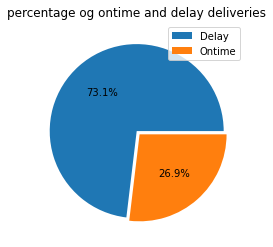

In [22]:
plt.rcParams['figure.figsize']=(5,5)
#explode = (0, 0.1, 0.2, 0.3, 0.4)
plt.pie(df['ontime/delay'].value_counts(), explode = (0, 0.05), autopct='%1.1f%%')
plt.title('percentage og ontime and delay deliveries')
plt.legend(['Delay', 'Ontime'])
plt.show()

In [23]:
#Let's check the supplier code for the unknown suppliers
df[df['supplierNameCode']=='Unknown']['supplierID'].value_counts()

999    316
Name: supplierID, dtype: int64

In [24]:
# Let's check whether having driver's mobile number making any impact on ontime delivery
df['Driver_MobileNo'].values[df['Driver_MobileNo'].values>0]=1
df['Driver_MobileNo'].fillna(0, inplace=True)
df[df['Driver_MobileNo']==1]['ontime/delay'].value_counts()

0    2003
1     677
Name: ontime/delay, dtype: int64

In [25]:
df[df['Driver_MobileNo']==0]['ontime/delay'].value_counts()

0    2321
1     914
Name: ontime/delay, dtype: int64

### Feature Encoding

In [26]:
#let's filter usefull data alone
df_cln=df[['Market/Regular ',
       'vehicle_no',
       'Current_Location',
       'TRANSPORTATION_DISTANCE_IN_KM',
       'vehicleType', 'Driver_Name',
       'Driver_MobileNo', 'customerID', 'supplierID',
       'Material Shipped', 'ontime/delay',
       'vehicle_states', 'Origin_states', 'Dest_states', 'Org_Dest_distance']]

In [27]:
#let's make a copy of filtered data
df_copy=df_cln.copy()

In [28]:
#df_cln['GpsProvider']=df_cln.GpsProvider.astype("category").cat.codes
#df_cln['BookingID']=df_cln.BookingID.astype("category").cat.codes
df_cln['vehicle_no']=df_cln.vehicle_no.astype("category").cat.codes
df_cln['customerID']=df_cln.customerID.astype("category").cat.codes
df_cln['supplierID']=df_cln.supplierID.astype("category").cat.codes
#df_cln['Origin_Location']=df_cln.Origin_Location.astype("category").cat.codes
#df_cln['Destination_Location']=df_cln.Destination_Location.astype("category").cat.codes
df_cln['Current_Location']=df_cln.Current_Location.astype("category").cat.codes
df_cln['vehicleType']=df_cln.vehicleType.astype("category").cat.codes
#df_cln['customerNameCode']=df_cln.customerNameCode.astype("category").cat.codes
#df_cln['supplierNameCode']=df_cln.supplierNameCode.astype("category").cat.codes
df_cln['Material Shipped']=df_cln['Material Shipped'].astype("category").cat.codes
df_cln['Market/Regular ']=df_cln['Market/Regular '].astype("category").cat.codes
df_cln['Driver_Name']=df_cln['Driver_Name'].astype("category").cat.codes
df_cln['vehicle_states']=df_cln.vehicle_states.astype("category").cat.codes
df_cln['Origin_states']=df_cln['Origin_states'].astype("category").cat.codes
df_cln['Dest_states']=df_cln['Dest_states'].astype("category").cat.codes

In [29]:
corr_matrix=df_cln.corr()
corr_matrix["ontime/delay"].sort_values(ascending=False)

ontime/delay                     1.000000
supplierID                       0.501116
vehicleType                      0.210720
vehicle_states                   0.203893
vehicle_no                       0.201877
Dest_states                      0.177922
Origin_states                    0.110959
TRANSPORTATION_DISTANCE_IN_KM    0.104201
Current_Location                 0.075365
Material Shipped                 0.013946
Driver_MobileNo                 -0.033591
Market/Regular                  -0.125841
Org_Dest_distance               -0.233739
Driver_Name                     -0.244567
customerID                      -0.258463
Name: ontime/delay, dtype: float64

In [30]:
x=df_cln.drop('ontime/delay', axis=1)
y=df_cln['ontime/delay'].values

### Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

#to_scale=df_cln.select_dtypes(include='number').columns.tolist()[1:-1]
sc=StandardScaler()
scaled=sc.fit_transform(x)
x_scl=pd.DataFrame(scaled, columns=x.columns)

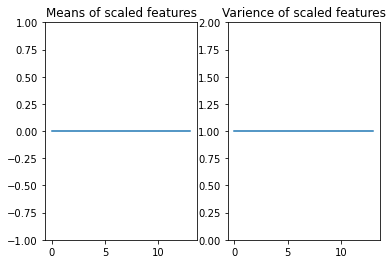

In [32]:
#check weathear data is standardized or not
plt.subplot(121)
plt.ylim(-1,1)

means=[]
for i in range(x_scl.shape[1]):
    means.append(np.mean(x_scl.iloc[:,i]))
plt.plot(means, scaley=False)
plt.title('Means of scaled features')

plt.subplot(122)
plt.ylim(0,2)
vars=[]
for i in range(x_scl.shape[1]):
    vars.append(np.var(x_scl.iloc[:,i]))
plt.plot(vars, scaley=False)
plt.title('Varience of scaled features')
plt.show()

### Model Building

In [33]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(x_scl,y,test_size=0.25,random_state=7)

In [59]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

# Define the model
model = Sequential()

# Add layers to the model
model.add(Dense(units=32, activation='relu', input_dim=14))  # Input layer with 14 features
model.add(Dropout(0.25))  # Dropout layer to prevent overfitting
model.add(Dense(units=16, activation='relu'))  # Hidden layer
model.add(Dropout(0.25))  # Dropout layer
model.add(Dense(units=1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 32)                480       
                                                                 
 dropout_16 (Dropout)        (None, 32)                0         
                                                                 
 dense_30 (Dense)            (None, 16)                528       
                                                                 
 dropout_17 (Dropout)        (None, 16)                0         
                                                                 
 dense_31 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1025 (4.00 KB)
Trainable params: 1025 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 500,callbacks=[early_stopping], validation_split=0.2)

Epoch 1/500


111/111 [==============================] - 2s 5ms/step - loss: 0.5331 - accuracy: 0.7492 - val_loss: 0.3939 - val_accuracy: 0.8570
Epoch 2/500
111/111 [==============================] - 0s 3ms/step - loss: 0.4082 - accuracy: 0.8441 - val_loss: 0.3559 - val_accuracy: 0.8660
Epoch 3/500
111/111 [==============================] - 0s 3ms/step - loss: 0.3812 - accuracy: 0.8546 - val_loss: 0.3445 - val_accuracy: 0.8660
Epoch 4/500
111/111 [==============================] - 0s 3ms/step - loss: 0.3736 - accuracy: 0.8557 - val_loss: 0.3384 - val_accuracy: 0.8694
Epoch 5/500
111/111 [==============================] - 0s 3ms/step - loss: 0.3688 - accuracy: 0.8627 - val_loss: 0.3358 - val_accuracy: 0.8694
Epoch 6/500
111/111 [==============================] - 0s 3ms/step - loss: 0.3576 - accuracy: 0.8627 - val_loss: 0.3340 - val_accuracy: 0.8671
Epoch 7/500
111/111 [==============================] - 0s 3ms/step - loss: 0.3545 - accuracy: 0.8610 - val_loss: 0.3319 - val_accuracy: 0.87

Epoch 55/500
111/111 [==============================] - 0s 3ms/step - loss: 0.2905 - accuracy: 0.8850 - val_loss: 0.2926 - val_accuracy: 0.8829
Epoch 56/500
111/111 [==============================] - 0s 3ms/step - loss: 0.2938 - accuracy: 0.8819 - val_loss: 0.2883 - val_accuracy: 0.8851
Epoch 57/500
111/111 [==============================] - 0s 2ms/step - loss: 0.2882 - accuracy: 0.8859 - val_loss: 0.2883 - val_accuracy: 0.8851
Epoch 58/500
111/111 [==============================] - 0s 3ms/step - loss: 0.2903 - accuracy: 0.8881 - val_loss: 0.2879 - val_accuracy: 0.8885
Epoch 59/500
111/111 [==============================] - 0s 3ms/step - loss: 0.2888 - accuracy: 0.8856 - val_loss: 0.2878 - val_accuracy: 0.8840
Epoch 60/500
111/111 [==============================] - 0s 3ms/step - loss: 0.2867 - accuracy: 0.8873 - val_loss: 0.2905 - val_accuracy: 0.8863
Epoch 61/500
111/111 [==============================] - 0s 3ms/step - loss: 0.2884 - accuracy: 0.8853 - val_loss: 0.2883 - val_accuracy:

In [62]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 88.41%


### Plotting training and validation loss over epochs

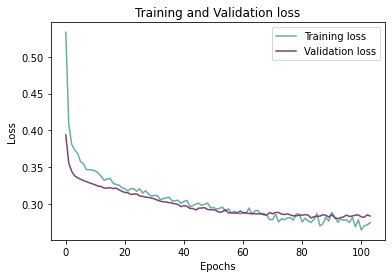

In [63]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

### Plotting training and validation accuracy over epochs

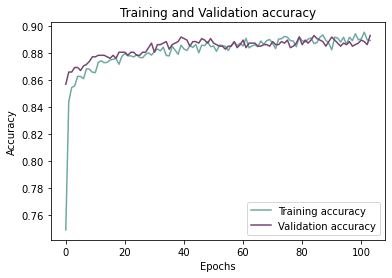

In [64]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

47/47 [==============================] - 0s 2ms/step


<AxesSubplot:>

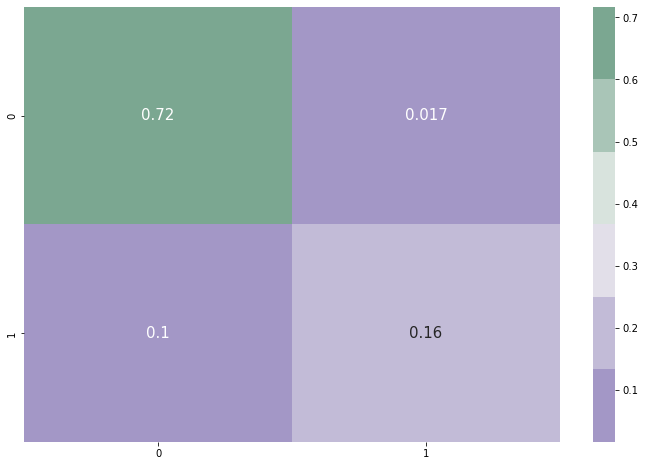

In [66]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()
# confusion matrix
cmap1 = sns.diverging_palette(275,150,  s=40, l=65, n=6)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1085
           1       0.91      0.61      0.73       394

    accuracy                           0.88      1479
   macro avg       0.89      0.79      0.83      1479
weighted avg       0.88      0.88      0.87      1479



In [68]:
#End